In [5]:
pwd

'C:\\Users\\Kriszta\\desktop\\datas'

In [84]:
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.impute import SimpleImputer
plt.rcParams['figure.figsize'] = (10,6)

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [19]:
df=pd.read_csv('Happiness_2019.csv')
df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [35]:
# Define Variable of interest
y = df['Score']
X = df.drop(['Score', 'Overall rank','Country or region'], axis=1)

# overall rank calculated from score - so will drop it
# also drop country or region as I am not interested in the countries but the connection between the happiness score
# and the different circumstances

In [21]:
y.shape, X.shape

((156,), (156, 6))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [23]:
X_train.shape, X_test.shape

((117, 6), (39, 6))

In [24]:
df_train = X_train.join(y_train)

In [25]:
df_train.isna().sum()  # nice dataset, no missing values

GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
Score                           0
dtype: int64

In [26]:
df_train.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Score
90,0.987,1.224,0.815,0.216,0.166,0.027,5.197
47,1.162,1.232,0.825,0.462,0.083,0.005,6.070
130,0.710,1.181,0.555,0.525,0.566,0.172,4.360
78,1.183,1.360,0.808,0.195,0.083,0.106,5.373
26,0.800,1.269,0.746,0.535,0.175,0.078,6.436


In [27]:
cols = list(df_train)
cols = [cols[-1]] + cols[:-1]
df_train = df_train[cols]   # interested in score, so made that the firs column

In [28]:
df_train.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
90,5.197,0.987,1.224,0.815,0.216,0.166,0.027
47,6.070,1.162,1.232,0.825,0.462,0.083,0.005
130,4.360,0.710,1.181,0.555,0.525,0.566,0.172
78,5.373,1.183,1.360,0.808,0.195,0.083,0.106
26,6.436,0.800,1.269,0.746,0.535,0.175,0.078


(7.0, 0.0)

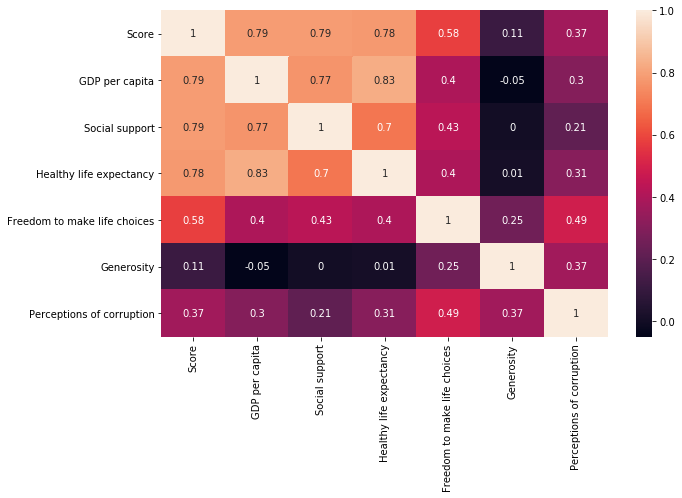

In [29]:
plt.rcParams['figure.figsize'] = (10,6)
corr_mat=df_train.corr().round(2)
ax=sns.heatmap(data=corr_mat, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

GDP per capita, social support and healthy life expectancy have the highest impact on the happiness score, and the lowest generosity

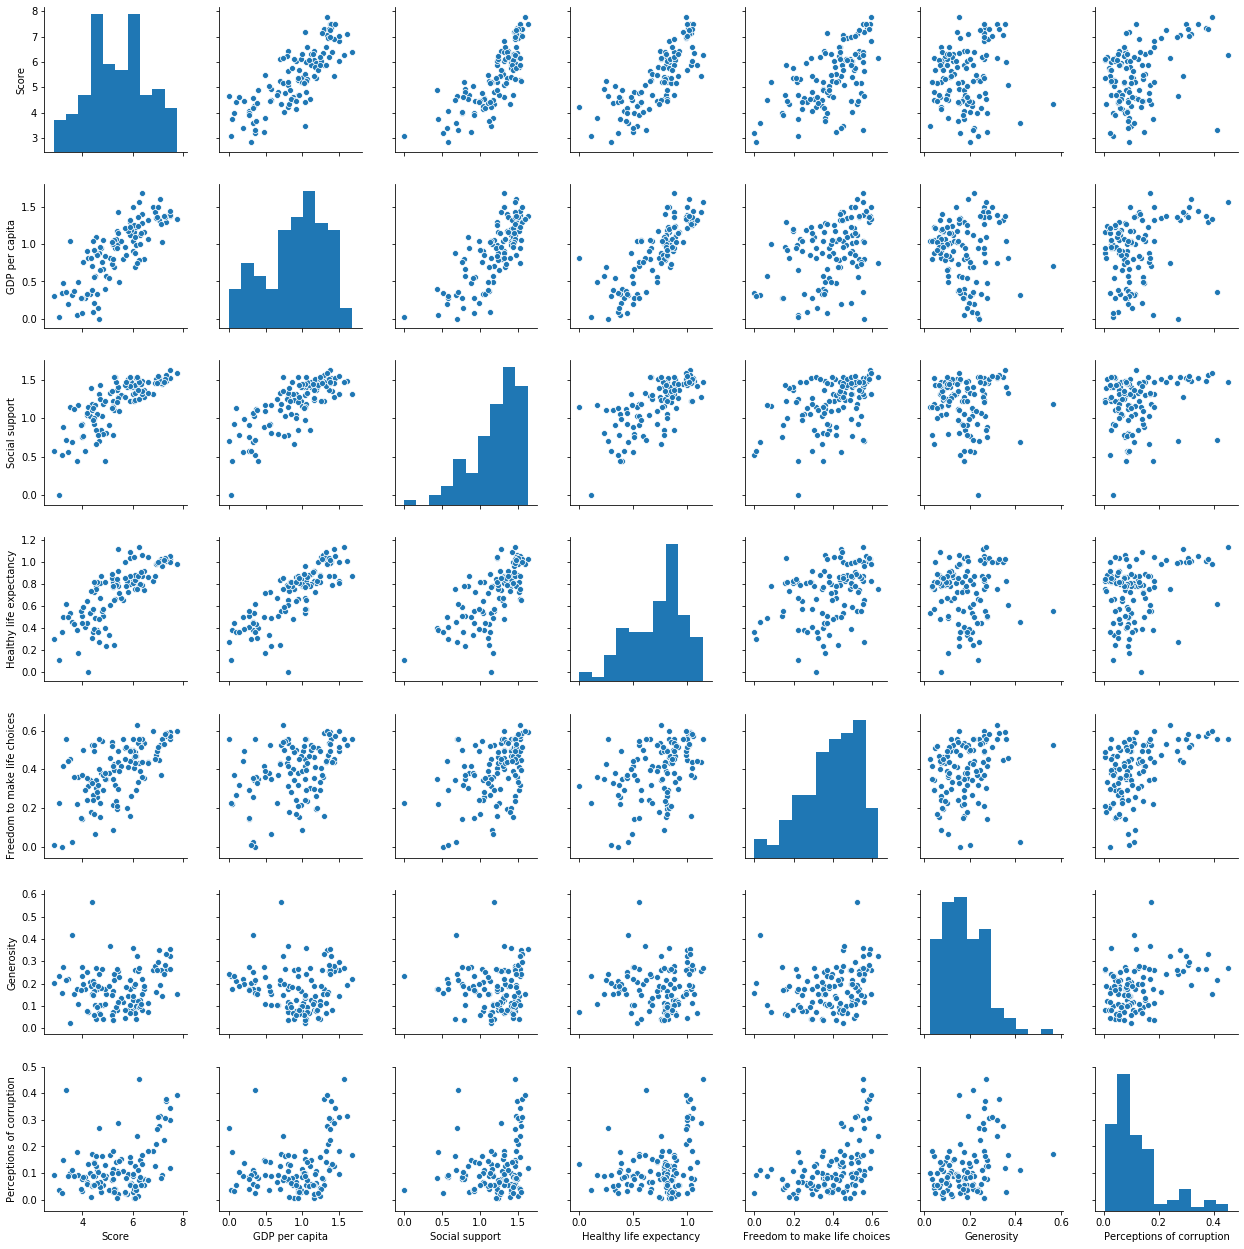

In [36]:
sns.pairplot(df_train)

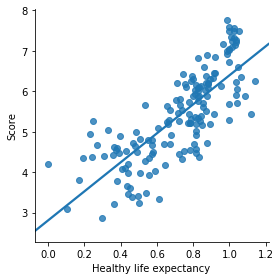

In [43]:
sns.lmplot(x="Healthy life expectancy", y="Score", data=df, ci=None, height=4)

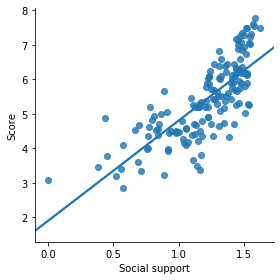

In [45]:
sns.lmplot(x="Social support", y="Score", data=df, ci=None, height=4)

Text(0.5, 0, 'Happiness score')

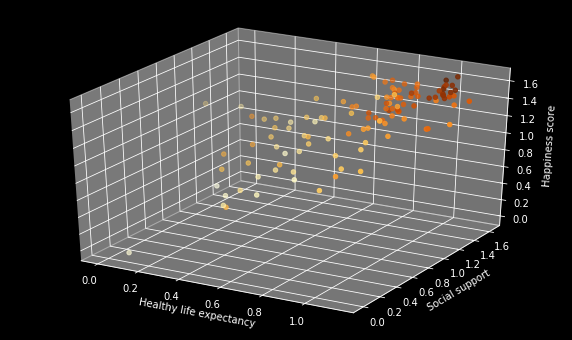

In [146]:
ax = plt.axes(projection='3d')

z = df_train['Score']
x = df_train['Healthy life expectancy']
y = df_train['Social support']
hap= ax.scatter(x, y, y,c=z, cmap='YlOrBr')

ax.set_xlabel('Healthy life expectancy')
ax.set_ylabel('Social support')
ax.set_zlabel('Happiness score')


In [37]:
df_train.describe()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000,117.000000
mean,5.403496,0.911718,1.198513,0.725154,0.393410,0.176701,0.119231
std,1.151376,0.408660,0.308236,0.246291,0.142619,0.093196,0.095511
min,2.853000,0.000000,0.000000,0.000000,0.000000,0.025000,0.005000
25%,4.519000,0.673000,1.039000,0.551000,0.305000,0.103000,0.055000
50%,5.386000,0.985000,1.274000,0.789000,0.417000,0.175000,0.091000
75%,6.199000,1.237000,1.442000,0.881000,0.508000,0.243000,0.147000
max,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [46]:
# let´s see the linear regression model without any feature engineering

In [57]:
m=LinearRegression()

In [58]:
m.fit(X_train, y_train)

LinearRegression()

In [59]:
m.score(X_train, y_train)

0.7855291581581748

In [49]:
m.score(X_test,y_test)

0.7375013963870155

In [61]:
(m.score(X_train, y_train)-m.score(X_test,y_test))*100

4.8027761771159305

In [52]:
y_pred = lm.predict(X_test)

In [54]:
# Model evaluation

In [55]:
# The mean squared error 
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The mean absolute error 
print('Mean absolute error: %.2f'
      % mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction f
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.26
Mean absolute error: 0.40
Coefficient of determination: 0.74
